## Code Attribution

The code presented in this section, which visualizes Fast Radio Bursts (FRBs) using dynamic spectra, is entirely my own work, authored by:

- **Dirk Kuiper**

This code does not draw from external sources or packages and represents an original implementation for the purpose of visualizing FRBs.

### Code Author
- **Dirk Kuiper**


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from plotting import *

In [4]:
# List of directories containing the saved data
directories = ["simulated_simple_bursts_v2", "simulated_scattered_bursts_v2", "simulated_complex_bursts_v2", "simulated_drifting_bursts_v2"]

for save_dir in directories:
    # List all the numpy array files in the directory
    file_list = [f for f in os.listdir(save_dir) if f.endswith(".npy")]

    snrs = []
    # Loop through the saved files and plot each burst
    for file in enumerate(file_list):
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(save_dir, file))

        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

        # plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)
        
        snrs.append(np.max(lightcurve))

        if np.max(lightcurve) > 20:
            plot_dynamic_spectra(dynamic_spectra_w_pulse)
            plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)

    # Plot the SNRs on a log-log scale
    plt.hist(snrs, bins=20, density=True, alpha=0.7, color='b')
    plt.xlabel("SNR")
    plt.ylabel("Frequency")
    plt.title("SNR Distribution (Log Scale)")
    plt.yscale('log')
    plt.show()


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'tuple'

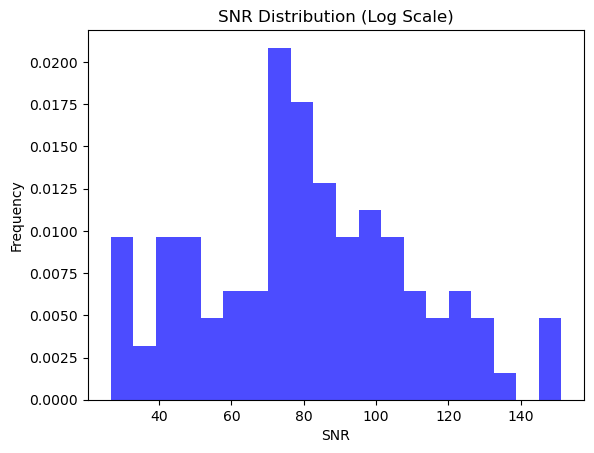

In [6]:
save_dir = "Constant_SNR_simple_narrow"

# List all the numpy array files in the directory
file_list = [f for f in os.listdir(save_dir) if f.endswith(".npy")]

snrs = []
# Loop through the saved files and plot each burst
for file in file_list:
    # Load the dynamic spectra from the numpy array
    dynamic_spectra_w_pulse = np.load(os.path.join(save_dir, file))

    lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

    # plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)
    
    snrs.append(np.max(lightcurve))

    # if np.max(lightcurve) > 25:
        # plot_dynamic_spectra(dynamic_spectra_w_pulse)
        # plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)

# Plot the SNRs on a log-log scale
plt.hist(snrs, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.title("SNR Distribution (Log Scale)")
# plt.yscale('log')
plt.show()

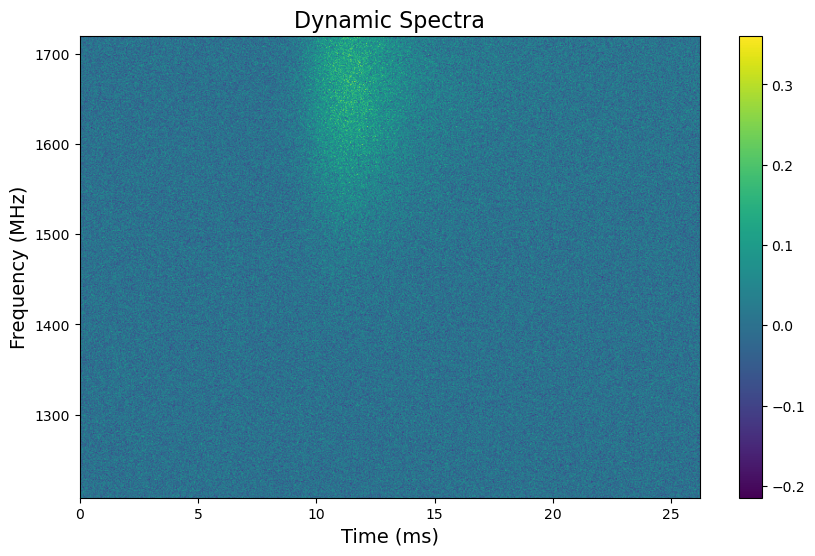

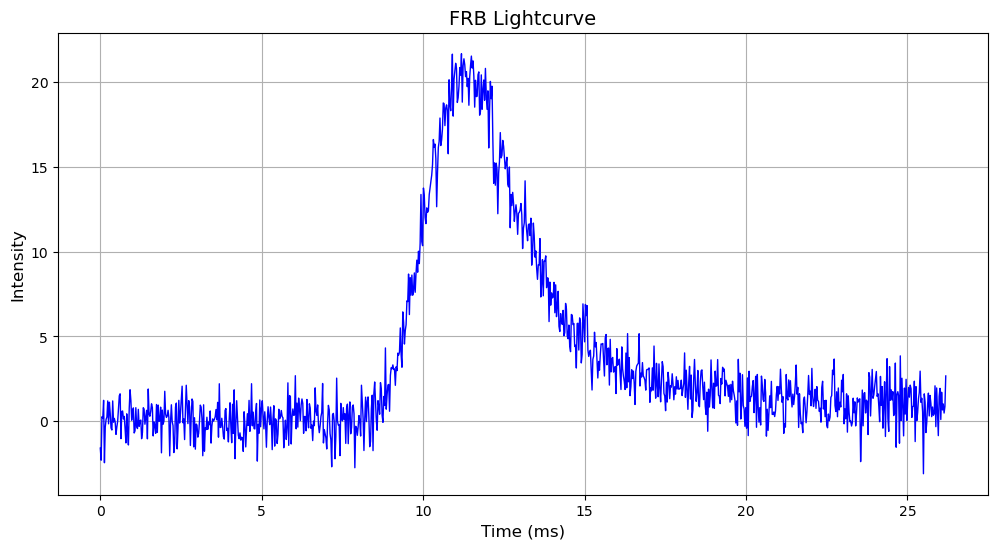

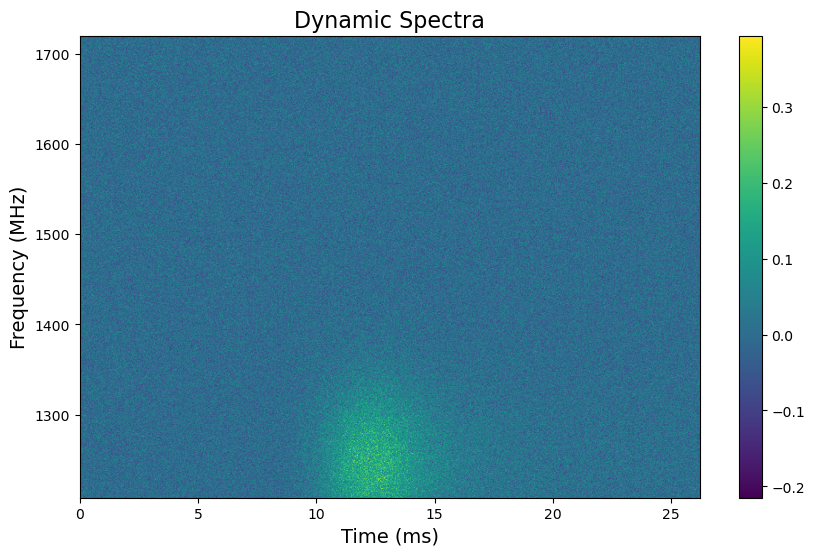

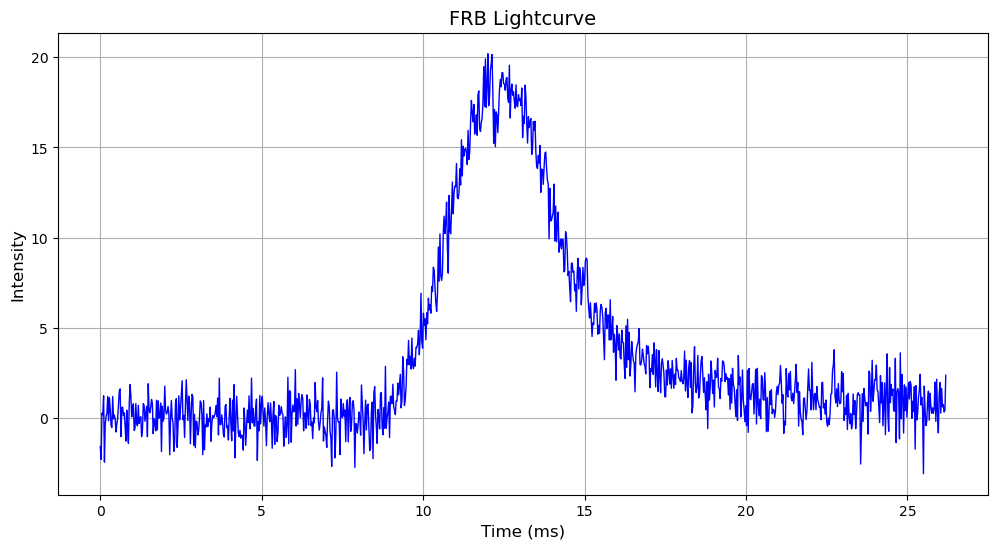

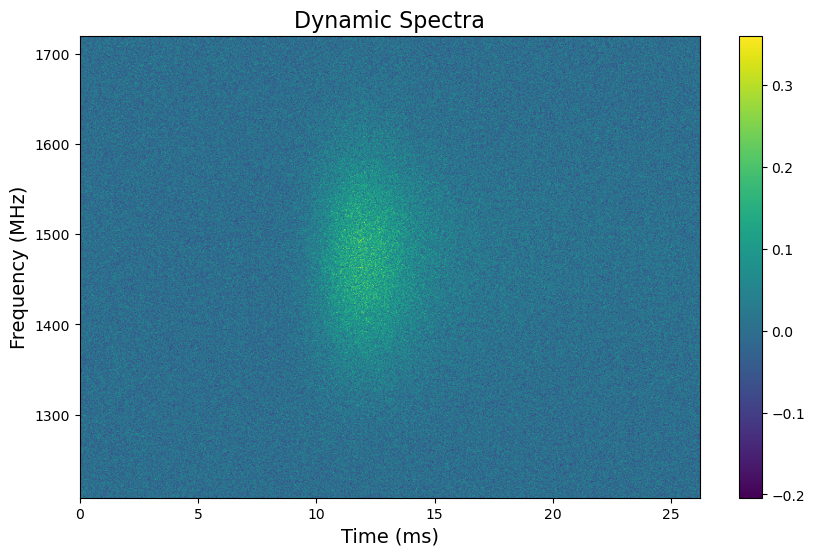

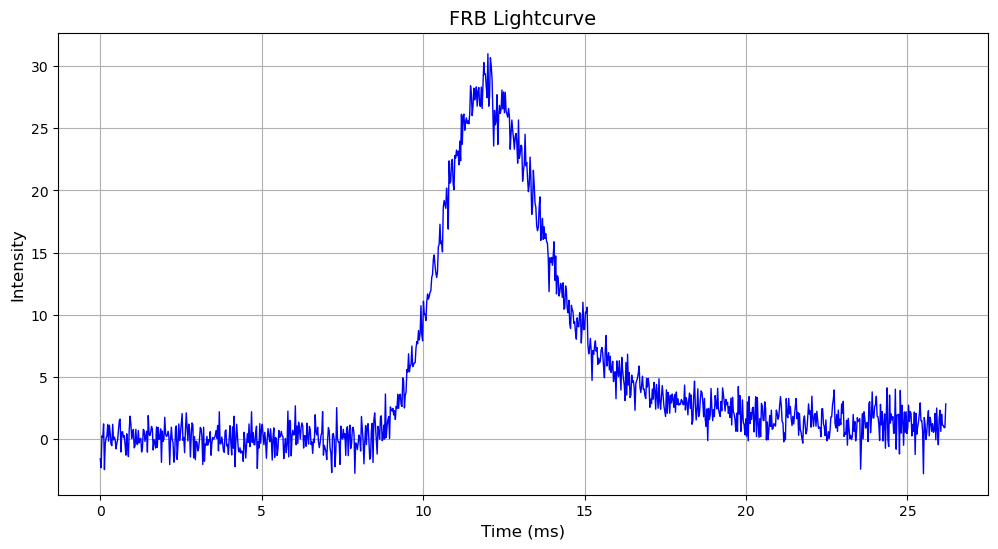

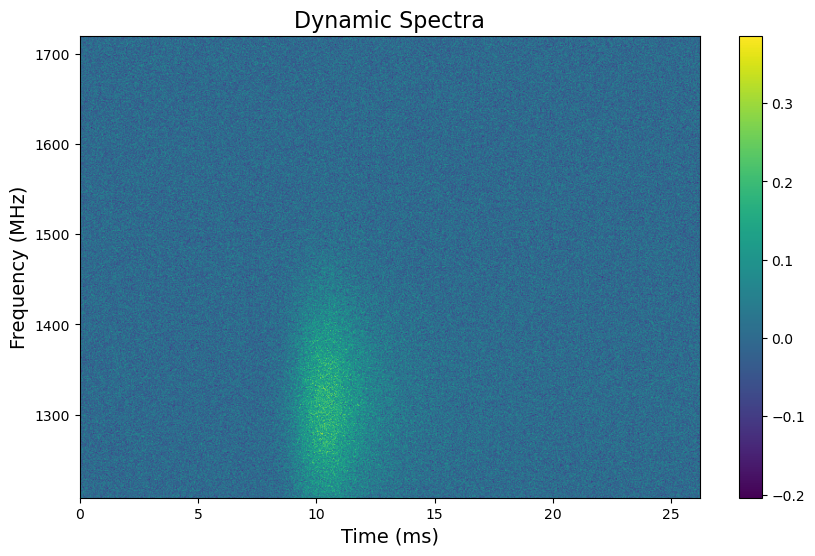

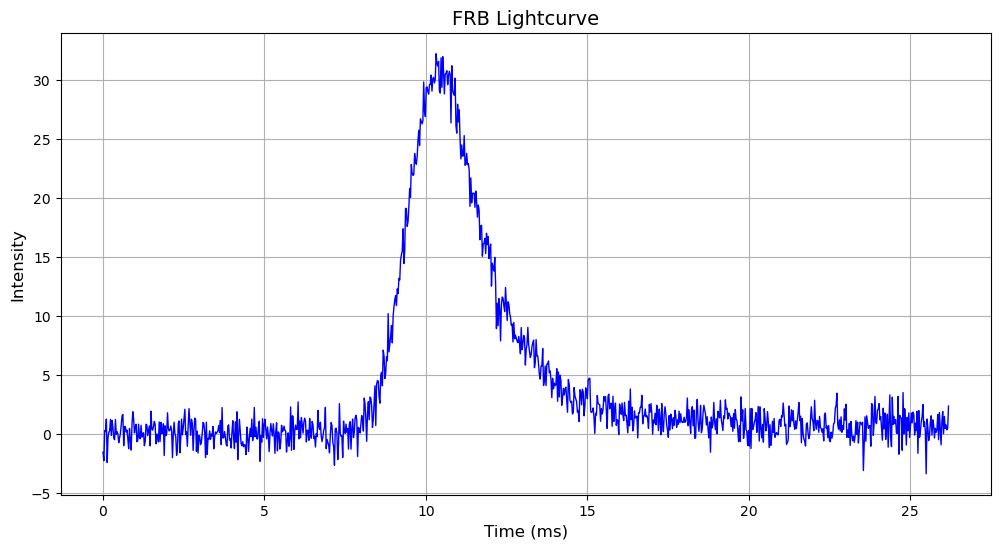

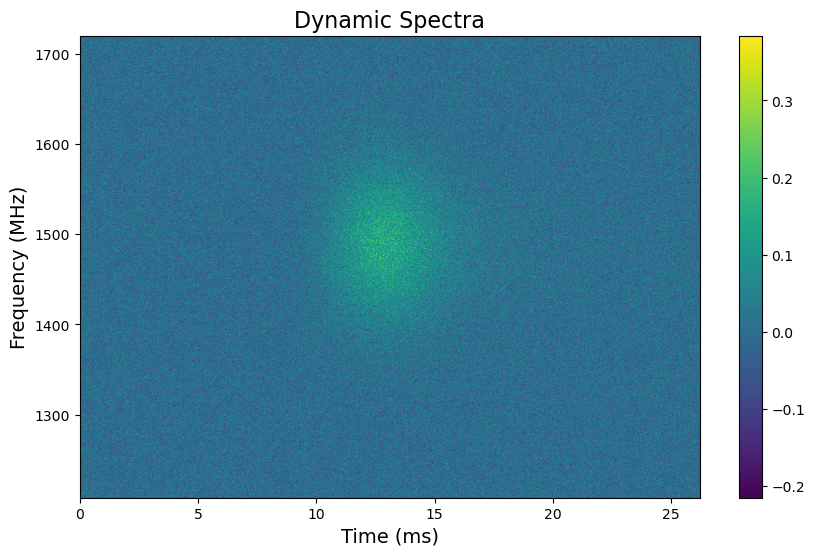

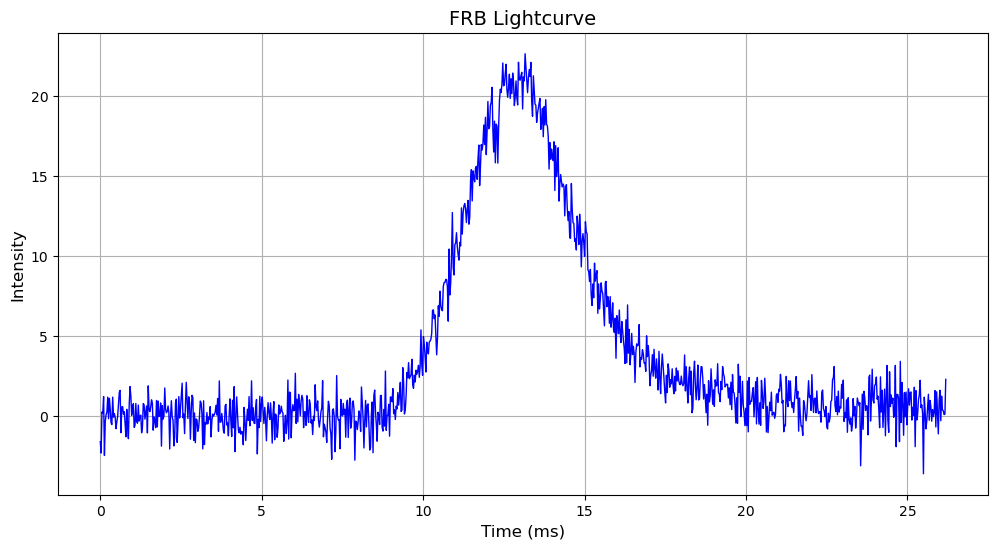

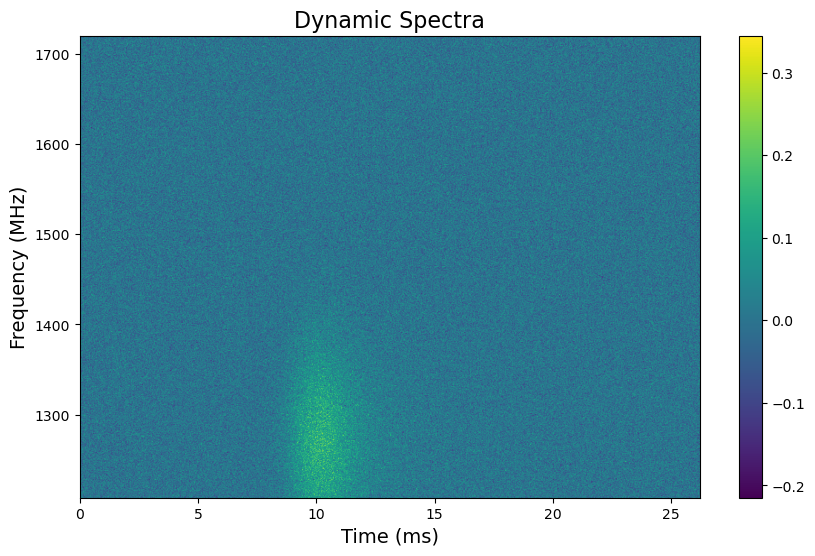

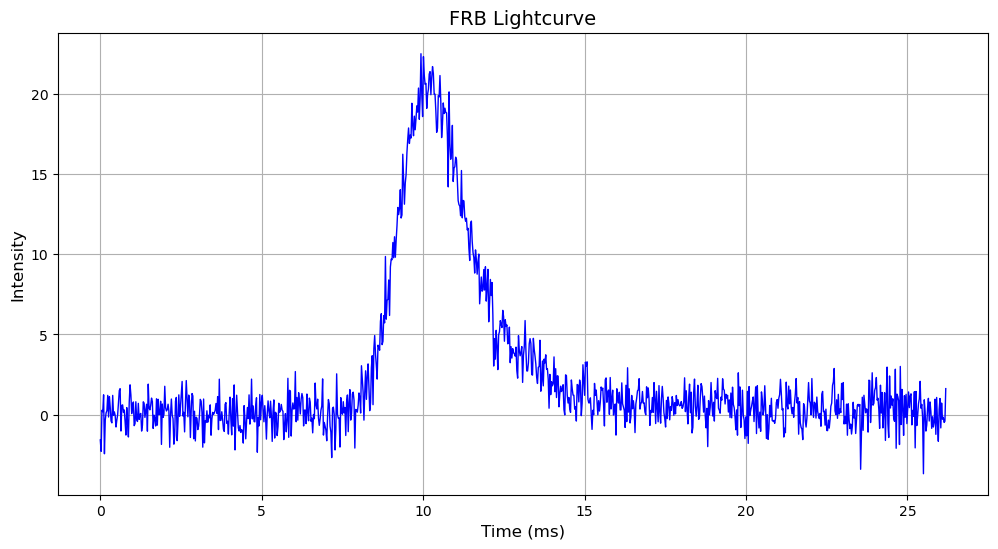

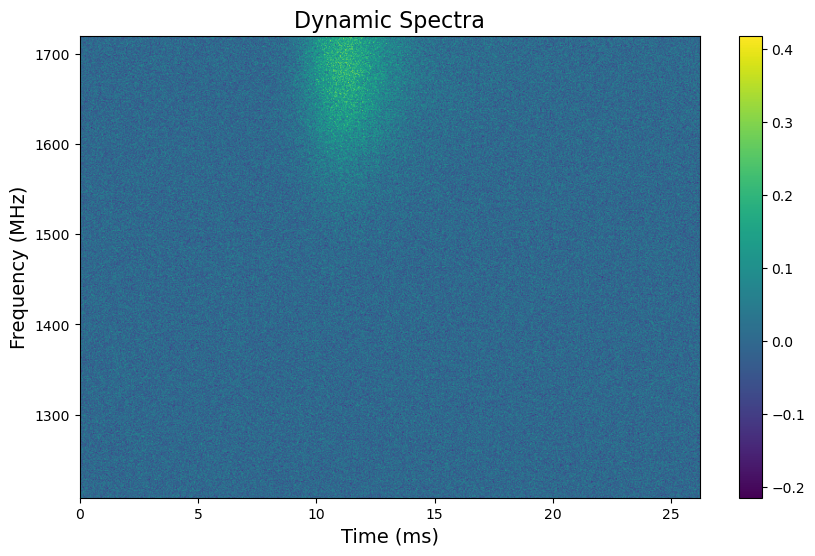

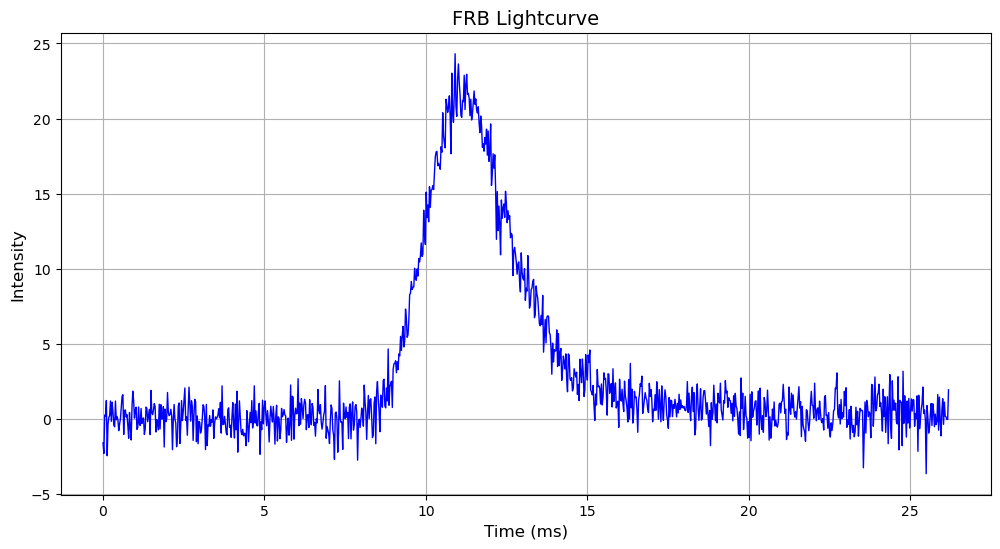

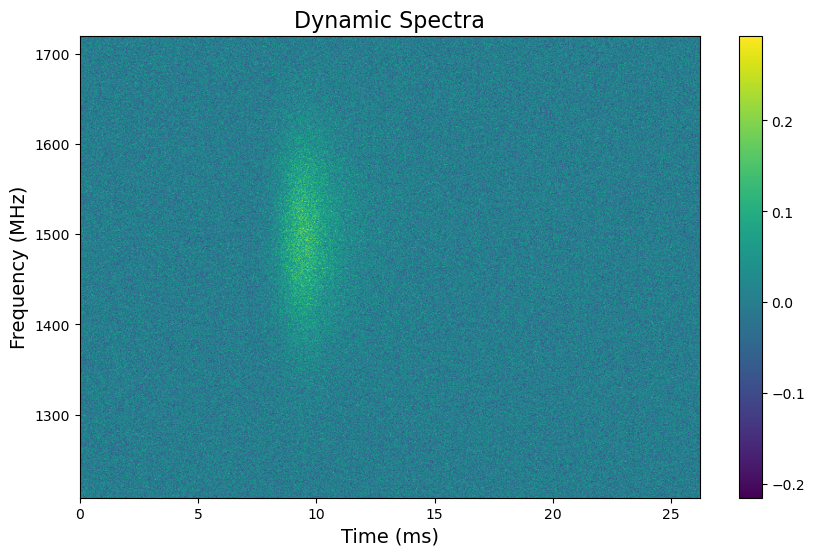

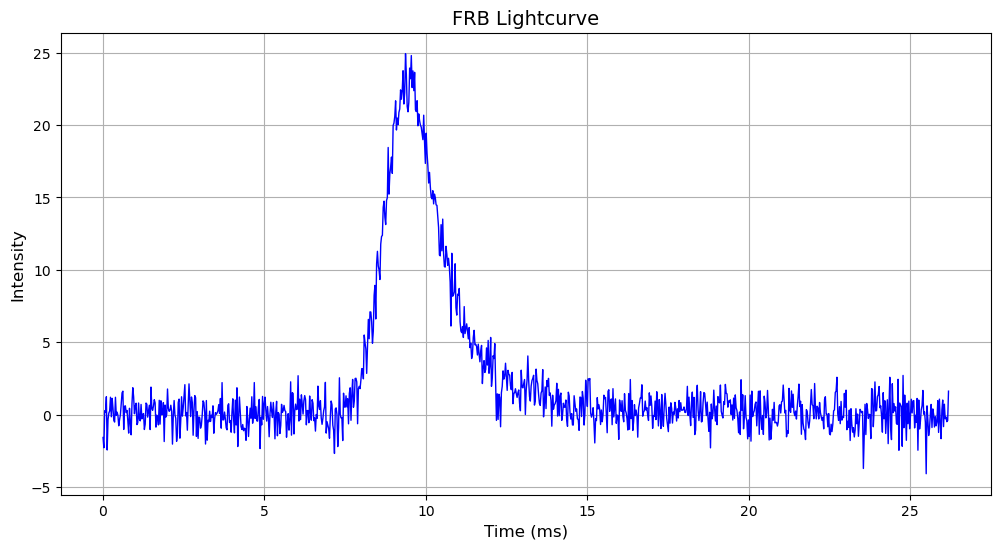

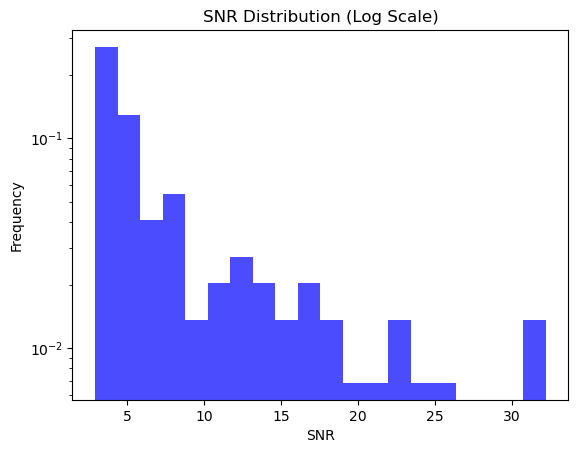

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory and CSV file
directory = "simulated_scattered_bursts_v2"
csv_file = "simulated_scattered_bursts_v2.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(os.path.join(directory, csv_file))

# Sort the DataFrame by "tau" in descending order and get the top 5 bursts
top_bursts = df.nlargest(100, "tau")

# Create a list of burst filenames in the format "frb_{burstnumber}.npy"
burst_filenames = ["frb_" + str(burst_number) + ".npy" for burst_number in top_bursts.index]

snrs = []
# Loop through the selected burst filenames
for file in burst_filenames:
    # Load the dynamic spectra from the numpy array
    dynamic_spectra_w_pulse = np.load(os.path.join(directory, file))

    lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

    # Calculate SNR
    snr = np.max(lightcurve)
    snrs.append(snr)

    # Only plot bursts with SNR > 25
    if snr > 20:
        plot_dynamic_spectra(dynamic_spectra_w_pulse)
        plot_lightcurve(time_samples=np.arange(1024), lightcurve=lightcurve)

# Plot the SNRs on a log-log scale
plt.hist(snrs, bins=20, density=True, alpha=0.7, color='b')
plt.xlabel("SNR")
plt.ylabel("Frequency")
plt.title("SNR Distribution (Log Scale)")
plt.yscale('log')
plt.show()
